In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [2]:
import warnings
warnings.filterwarnings("ignore") 

In [3]:
df = pd.read_csv("IndianElection19TwitterData.csv",index_col=0)

In [4]:
df

,Date,User,Tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...
...,...,...,...
142561,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...
142562,2019-03-06 10:11:43+00:00,RAMANKAIRA,@DrKumarVishwas Early morning #political move ...
142563,2019-01-24 12:57:48+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...
142564,2019-01-24 12:48:37+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142566 entries, 0 to 142565
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Date    142566 non-null  object
 1   User    142566 non-null  object
 2   Tweet   142566 non-null  object
dtypes: object(3)
memory usage: 4.4+ MB


In [6]:
modi_keywords = ["Modi", "PM", "modi", "#PMModi", "modi ji", "narendra modi", "@narendramodi", "#Vote4Modi"]
modi_df = pd.DataFrame(columns=["Date", "User", "Tweet"])

def contains_modi_keywords(tweet):
    words = tweet.split()
    for keyword in modi_keywords:
        if keyword in words:
            return True

for row in df.values:
    if contains_modi_keywords(str(row[2])):
        modi_df = pd.concat([modi_df, pd.DataFrame({"Date": [row[0]], "User": [row[1]], "Tweet": [row[2]]})], ignore_index=True)

modi_df

,Date,User,Tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
2,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
3,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...
4,2019-05-18 21:22:29+00:00,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...
...,...,...,...
25678,2019-04-09 12:06:31+00:00,shv_indian,#1DDrive #ModiSpeaksToNews18 #LokSabhaElection...
25679,2019-03-29 15:42:44+00:00,SONUPINKOO,I am seriously worried about future of Indian ...
25680,2019-03-29 13:28:51+00:00,SONUPINKOO,If @narendramodi is so Bad then Why does @INCI...
25681,2019-03-23 05:06:36+00:00,SONUPINKOO,"On this 23rd March (Pakistan Day), I Urge all ..."


In [7]:
import pandas as pd

rahul = ["rahul", "Rahul", "RahulGandhi", "gandhi", "@RahulGandhi", "Gandhi", "#Vote4Rahul", "#Vote4Gandhi", "#Vote4RahulGandhi"]

rahul_df = pd.DataFrame(columns=["Date", "User", "Tweet"])

def israhul(tweet):
    t = tweet.split()
    for i in rahul:
        if i in t:
            return True

for row in df.values:
    if israhul(str(row[2])):
        rahul_df = pd.concat([rahul_df, pd.DataFrame({"Date": [row[0]], "User": [row[1]], "Tweet": [row[2]]})], ignore_index=True)

rahul_df

,Date,User,Tweet
0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder why no academic or journalist asks INC ...
1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats for the change #australiavotes2019 an...
2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...
3,2019-05-18 18:52:03+00:00,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ..."
4,2019-05-18 18:31:10+00:00,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...
...,...,...,...
14143,2019-03-23 04:53:54+00:00,SunjayJK,"@quizzicalguy In this #LokSabhaElections2019, ..."
14144,2019-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...
14145,2019-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...
14146,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...


In [8]:
import pandas as pd

other_party = ["Mamta Banerjee", "@ArvindKejriwal", "#KejriwalAssassinationClaim", "West Bengal", "@IYCTelangana", "Telangana", "Tamil Nadu"]

partys = pd.DataFrame(columns=["Date", "User", "Tweet"])

def parteses(tweet):
    t = tweet.split()
    for i in other_party:
        if i in t:
            return True

for row in df.values:
    if parteses(str(row[2])):
        partys = pd.concat([partys, pd.DataFrame({"Date": [row[0]], "User": [row[1]], "Tweet": [row[2]]})], ignore_index=True)

partys

,Date,User,Tweet
0,2019-05-18 20:05:42+00:00,Kevin95958680,@ArvindKejriwal you actually have the audacity...
1,2019-05-18 19:33:41+00:00,Jaydeep_Bapat,#KejriwalAssassinationClaim is fake. He's smar...
2,2019-05-18 19:30:30+00:00,Jaydeep_Bapat,#KejriwalAssassinationClaim is as genuine as #...
3,2019-05-18 19:27:54+00:00,sheikh541,#BJP was renamed as Safroon Party then again i...
4,2019-05-18 17:01:35+00:00,VijayMittal2512,@Ahmed1Hilal Calculation of @ArvindKejriwal 's...
...,...,...,...
1914,2019-04-12 16:27:42+00:00,SunjayJK,@VishalDadlani @ECISVEEP 🙈🙉🙊\n😴😴😴\n#ElectionCo...
1915,2019-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...
1916,2019-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...
1917,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...


In [9]:
No_vote = ["Nota", "Dont vote"]

Votes = pd.DataFrame(columns=["Date", "User", "Tweet"])

def Votes_(tweet):
    t = tweet.split()
    for i in No_vote:
        if i in t:
            return True

for row in df.values:
    if Votes_(str(row[2])):
        Votes = pd.concat([Votes, pd.DataFrame({"Date": [row[0]], "User": [row[1]], "Tweet": [row[2]]})], ignore_index=True)

Votes

,Date,User,Tweet
0,2019-04-07 14:33:24+00:00,Narendransp,How long time u do politics with hindu Mr Modi...
1,2019-04-04 15:35:46+00:00,kundra64,#Nota can be converted if #BJP thinks about sm...
2,2019-04-01 19:13:22+00:00,indianancient00,@SunandaBLR @swamiyogeshji @ShefVaidya @Aabhas...
3,2019-03-27 07:48:38+00:00,devnc,@dhruv_rathee If this party #BJP comes to powe...
4,2019-03-06 15:33:43+00:00,parasaran,@Actor_Siddharth As you have turned critical o...
5,2019-02-18 12:50:18+00:00,mvthaker,#BJP Alliance in Maharashtra is not correct mo...
6,2019-04-25 08:14:46+00:00,satyadev17,Nota should be replaced by negative voting...i...
7,2019-04-17 14:39:33+00:00,Dhichkyaaon,"Tomorrow's a big day, vote carefully India. No..."
8,2019-04-16 08:55:13+00:00,shubhamr528,#LokSabhaElections2019 #BanAzamKhan #SayNoToNO...
9,2019-04-16 03:24:48+00:00,highratedghabru,Do not Go for NOTA.\n Its a waste of our vote ...


In [10]:
from sklearn.feature_extraction import text
import string
stop = text.ENGLISH_STOP_WORDS

In [11]:
Votes['Tweet'] = Votes['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
modi_df['Tweet'] = modi_df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
rahul_df['Tweet'] = rahul_df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
partys['Tweet'] = partys['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [12]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

modi_df['Tweet'] = modi_df['Tweet'].apply(remove_punctuations)
rahul_df['Tweet'] = rahul_df['Tweet'].apply(remove_punctuations)
Votes['Tweet'] = Votes['Tweet'].apply(remove_punctuations)
partys['Tweet'] = partys['Tweet'].apply(remove_punctuations)

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [14]:
def calculate_polarity(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['pos'], sentiment['neg'], sentiment['neu']
modi_df['pos'], modi_df['neg'], modi_df['neu'] = zip(*modi_df['Tweet'].apply(calculate_polarity))

In [15]:
def calculate_polarity(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['pos'], sentiment['neg'], sentiment['neu']
rahul_df['pos'], rahul_df['neg'], rahul_df['neu'] = zip(*rahul_df['Tweet'].apply(calculate_polarity))

In [16]:
def calculate_polarity(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['pos'], sentiment['neg'], sentiment['neu']
partys['pos'], partys['neg'], partys['neu'] = zip(*partys['Tweet'].apply(calculate_polarity))

In [17]:
def calculate_polarity(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['pos'], sentiment['neg'], sentiment['neu']
Votes['pos'], Votes['neg'], Votes['neu'] = zip(*Votes['Tweet'].apply(calculate_polarity))

In [18]:
emotion=[]
for i in range(0,25683):
    emotion.append(max(modi_df['pos'][i],modi_df['neu'][i],modi_df['neg'][i]))
modi_df['Emotion']=emotion
for i in range(0,25683):
    if modi_df['Emotion'][i]==modi_df['pos'][i]:
        modi_df['Emotion'][i]='positive'
    elif modi_df['Emotion'][i]==modi_df['neg'][i]:
        modi_df['Emotion'][i]='negative' 
    elif modi_df['Emotion'][i]==modi_df['neu'][i]:
        modi_df['Emotion'][i]='neutral'
modi_df

,Date,User,Tweet,pos,neg,neu,Emotion
0,2019-05-18 23:50:47+00:00,advosushildixit,anjanaomkashyap I seeing future bjp spokespers...,0.307,0.000,0.693,neutral
1,2019-05-18 23:00:03+00:00,jiaeur,LokSabhaElections2019 23rd May 2019 reveal Ev...,0.228,0.000,0.772,neutral
2,2019-05-18 22:53:54+00:00,PVenkatGandhi,LokSabhaElections2019 23rd May 2019 reveal Ev...,0.228,0.000,0.772,neutral
3,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates new record PM democratic count...,0.313,0.000,0.687,neutral
4,2019-05-18 21:22:29+00:00,ShakeChilli,abhijitmajumder Appointment Successor God forb...,0.215,0.110,0.675,neutral
...,...,...,...,...,...,...,...
25678,2019-04-09 12:06:31+00:00,shv_indian,1DDrive ModiSpeaksToNews18 LokSabhaElections20...,0.000,0.136,0.864,neutral
25679,2019-03-29 15:42:44+00:00,SONUPINKOO,I seriously worried future Indian democracy na...,0.276,0.109,0.615,neutral
25680,2019-03-29 13:28:51+00:00,SONUPINKOO,If narendramodi Bad Why does INCIndia needs Ma...,0.000,0.156,0.844,neutral
25681,2019-03-23 05:06:36+00:00,SONUPINKOO,On 23rd March Pakistan Day I Urge Indians Dere...,0.000,0.000,1.000,neutral


In [19]:
modi_df['Emotion'].value_counts()

Emotion
neutral     24994
positive      532
negative      157
Name: count, dtype: int64

In [20]:
emotion=[]
for i in range(0,14148):
    emotion.append(max(rahul_df['pos'][i],rahul_df['neu'][i],rahul_df['neg'][i]))
rahul_df['Emotion']=emotion
for i in range(0,14148):
    if rahul_df['Emotion'][i]== rahul_df['pos'][i]:
        rahul_df['Emotion'][i]='positive'
    elif rahul_df['Emotion'][i]== rahul_df['neg'][i]:
        rahul_df['Emotion'][i]='negative' 
    elif rahul_df['Emotion'][i]== rahul_df['neu'][i]:
        rahul_df['Emotion'][i]='neutral'
rahul_df

,Date,User,Tweet,pos,neg,neu,Emotion
0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder academic journalist asks INC India Rahu...,0.093,0.138,0.769,neutral
1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats change australiavotes2019 ScottMorris...,0.152,0.000,0.848,neutral
2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya” Unse pu...,0.000,0.000,1.000,neutral
3,2019-05-18 18:52:03+00:00,JosephPravinP,ajaymaken RahulGandhi And final touch Modi ji ...,0.318,0.000,0.682,neutral
4,2019-05-18 18:31:10+00:00,VandanaMegastar,LokSabhaElections2019 Anyone having mass backi...,0.083,0.088,0.828,neutral
...,...,...,...,...,...,...,...
14143,2019-03-23 04:53:54+00:00,SunjayJK,quizzicalguy In LokSabhaElections2019 India Ec...,0.194,0.000,0.806,neutral
14144,2019-03-17 08:53:28+00:00,SunjayJK,AnumaVidisha RahulGandhi ArvindKejriwal Spokes...,0.196,0.068,0.737,neutral
14145,2019-03-06 10:20:09+00:00,RAMANKAIRA,sherryontopp Early morning political detailed ...,0.097,0.000,0.903,neutral
14146,2019-03-06 10:18:02+00:00,RAMANKAIRA,mayankgandhi04 mallesh2004 Early morning polit...,0.094,0.000,0.906,neutral


In [21]:
rahul_df['Emotion'].value_counts()

Emotion
neutral     13817
positive      225
negative      106
Name: count, dtype: int64

In [22]:
emotion=[]
for i in range(0,1919):
    emotion.append(max(partys['pos'][i],partys['neu'][i],partys['neg'][i]))
partys['Emotion']=emotion
for i in range(0,1919):
    if partys['Emotion'][i]== partys['pos'][i]:
        partys['Emotion'][i]='positive'
    elif partys['Emotion'][i]== partys['neg'][i]:
        partys['Emotion'][i]='negative' 
    elif partys['Emotion'][i]== partys['neu'][i]:
        partys['Emotion'][i]='neutral'
partys

,Date,User,Tweet,pos,neg,neu,Emotion
0,2019-05-18 20:05:42+00:00,Kevin95958680,ArvindKejriwal actually audacity think matter ...,0.052,0.138,0.810,neutral
1,2019-05-18 19:33:41+00:00,Jaydeep_Bapat,KejriwalAssassinationClaim fake Hes smart know...,0.176,0.383,0.441,neutral
2,2019-05-18 19:30:30+00:00,Jaydeep_Bapat,KejriwalAssassinationClaim genuine kejriwal hi...,0.000,0.151,0.849,neutral
3,2019-05-18 19:27:54+00:00,sheikh541,BJP renamed Safroon Party named Modi Party bod...,0.351,0.000,0.649,neutral
4,2019-05-18 17:01:35+00:00,VijayMittal2512,Ahmed1Hilal Calculation ArvindKejriwal s Vote ...,0.094,0.000,0.906,neutral
...,...,...,...,...,...,...,...
1914,2019-04-12 16:27:42+00:00,SunjayJK,VishalDadlani ECISVEEP 🙈🙉🙊 😴😴😴 ElectionCommiss...,0.000,0.093,0.907,neutral
1915,2019-03-17 08:53:28+00:00,SunjayJK,AnumaVidisha RahulGandhi ArvindKejriwal Spokes...,0.196,0.068,0.737,neutral
1916,2019-03-06 10:20:09+00:00,RAMANKAIRA,sherryontopp Early morning political detailed ...,0.097,0.000,0.903,neutral
1917,2019-03-06 10:18:02+00:00,RAMANKAIRA,mayankgandhi04 mallesh2004 Early morning polit...,0.094,0.000,0.906,neutral


In [23]:
partys['Emotion'].value_counts()

Emotion
neutral     1896
positive      13
negative      10
Name: count, dtype: int64

In [24]:
emotion=[]
for i in range(0,13):
    emotion.append(max(Votes['pos'][i],Votes['neu'][i],Votes['neg'][i]))
Votes['Emotion']=emotion
for i in range(0,13):
    if Votes['Emotion'][i]== Votes['pos'][i]:
        Votes['Emotion'][i]='positive'
    elif Votes['Emotion'][i]== Votes['neg'][i]:
        Votes['Emotion'][i]='negative' 
    elif Votes['Emotion'][i]== Votes['neu'][i]:
        Votes['Emotion'][i]='neutral'
Votes

,Date,User,Tweet,pos,neg,neu,Emotion
0,2019-04-07 14:33:24+00:00,Narendransp,How long time u politics hindu Mr Modi Plz mak...,0.345,0.050,0.605,neutral
1,2019-04-04 15:35:46+00:00,kundra64,Nota converted BJP thinks small amp middle cla...,0.097,0.131,0.772,neutral
2,2019-04-01 19:13:22+00:00,indianancient00,SunandaBLR swamiyogeshji ShefVaidya Aabhas24 T...,0.174,0.189,0.637,neutral
3,2019-03-27 07:48:38+00:00,devnc,dhruvrathee If party BJP comes power Hitlerish...,0.129,0.201,0.670,neutral
4,2019-03-06 15:33:43+00:00,parasaran,ActorSiddharth As turned critical BJP Please t...,0.124,0.124,0.753,neutral
5,2019-02-18 12:50:18+00:00,mvthaker,BJP Alliance Maharashtra correct narendramodi ...,0.000,0.000,1.000,neutral
6,2019-04-25 08:14:46+00:00,satyadev17,Nota replaced negative votingit advantage demo...,0.102,0.188,0.711,neutral
7,2019-04-17 14:39:33+00:00,Dhichkyaaon,Tomorrows big day vote carefully India Nota I...,0.184,0.000,0.816,neutral
8,2019-04-16 08:55:13+00:00,shubhamr528,LokSabhaElections2019 BanAzamKhan SayNoToNOTA ...,0.133,0.000,0.867,neutral
9,2019-04-16 03:24:48+00:00,highratedghabru,Do Go NOTA Its waste vote votebis important No...,0.204,0.133,0.664,neutral


In [25]:
Votes['Emotion'].value_counts()

Emotion
neutral     12
negative     1
Name: count, dtype: int64

In [26]:
NaMo_ref = ["Modi","PM","modi", "#PMModi","modi ji", "narendra modi", "@narendramodi","#Vote4Modi"]
RaGa_ref = ["rahul", "Rahul","RahulGandhi", "gandhi","@RahulGandhi","Gandhi","#Vote4Rahul","#Vote4Gandhi","#Vote4RahulGandhi"]
vote_no = ["Nota","Dont vote"]
partyother = ["Mamta Banerjee","@ArvindKejriwal","#KejriwalAssassinationClaim","West Bengal","@IYCTelangana","Telangana","Tamil Nadu"]

In [27]:
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

In [28]:
df['NaModi'] = df['Tweet'].apply(lambda x: identify_subject(x, NaMo_ref))
df['RaGandhi'] = df['Tweet'].apply(lambda x: identify_subject(x, RaGa_ref))
df['other_party'] = df['Tweet'].apply(lambda x: identify_subject(x, partyother))
df['No_vote'] = df['Tweet'].apply(lambda x: identify_subject(x, vote_no))
df=df[(df['other_party'] | df['NaModi']==1) | (df['RaGandhi']==1) | df['No_vote']]

In [29]:
df

,Date,User,Tweet,NaModi,RaGandhi,other_party,No_vote
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0,0,0
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0,0,0
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0,0,0
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0,0,0
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0,0,0
...,...,...,...,...,...,...,...
142555,2019-03-19 15:37:34+00:00,parthajit0101,"@timesofindia #ArvindKejriwal, #AAP sirji pls ...",1,0,0,0
142556,2019-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,1,1,1,0
142560,2019-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...,0,1,1,0
142561,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,0,1,1,0


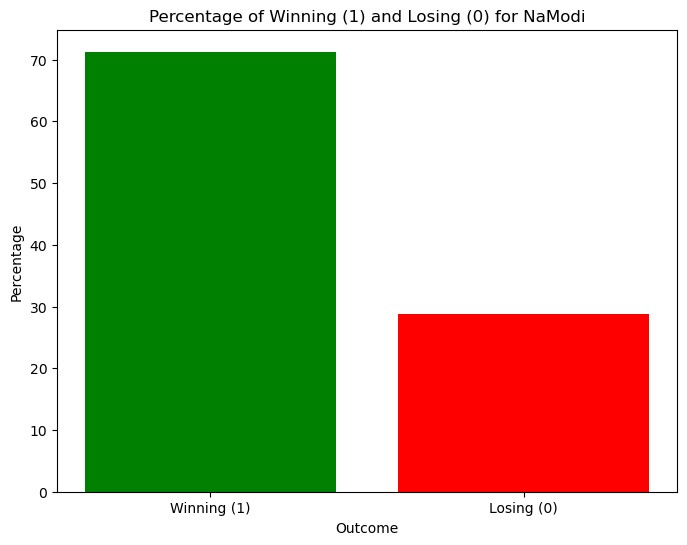

In [30]:
value_counts = df['NaModi'].value_counts()
percentage_1 = (value_counts[1] / len(df)) * 100
percentage_0 = (value_counts[0] / len(df)) * 100
plt.figure(figsize=(8, 6))
percentages = [percentage_1, percentage_0]
labels = ['Winning (1)', 'Losing (0)']
plt.bar(labels, percentages, color=['green', 'red'])
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.title('Percentage of Winning (1) and Losing (0) for NaModi')
plt.show()

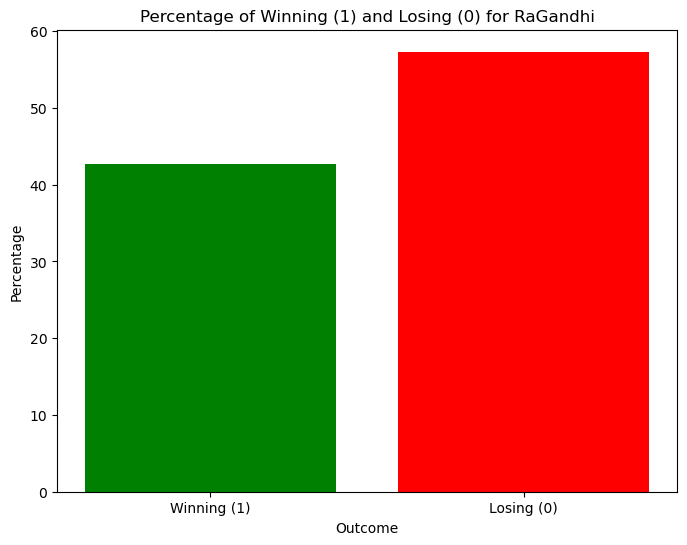

In [31]:
value_counts = df['RaGandhi'].value_counts()
percentage_1 = (value_counts[1] / len(df)) * 100
percentage_0 = (value_counts[0] / len(df)) * 100
plt.figure(figsize=(8, 6))
percentages = [percentage_1, percentage_0]
labels = ['Winning (1)', 'Losing (0)']
plt.bar(labels, percentages, color=['green', 'red'])
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.title('Percentage of Winning (1) and Losing (0) for RaGandhi')
plt.show()

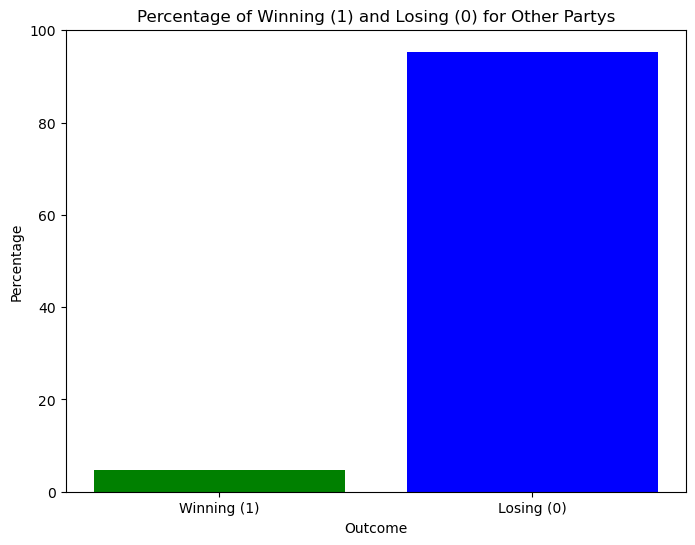

In [32]:
value_counts = df['other_party'].value_counts()
percentage_1 = (value_counts[1] / len(df)) * 100
percentage_0 = (value_counts[0] / len(df)) * 100
plt.figure(figsize=(8, 6))
percentages = [percentage_1, percentage_0]
labels = ['Winning (1)', 'Losing (0)']
plt.bar(labels, percentages, color=['green', 'blue'])
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.title('Percentage of Winning (1) and Losing (0) for Other Partys')
plt.show()

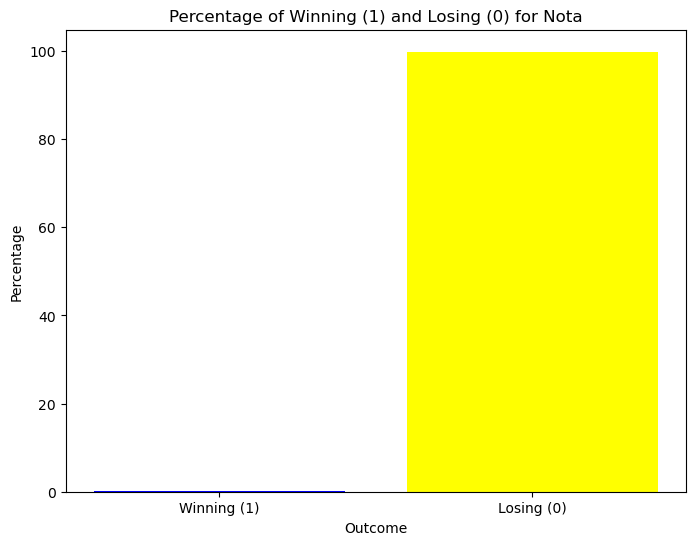

In [33]:
value_counts = df['No_vote'].value_counts()
percentage_1 = (value_counts[1] / len(df)) * 100
percentage_0 = (value_counts[0] / len(df)) * 100
plt.figure(figsize=(8, 6))
percentages = [percentage_1, percentage_0]
labels = ['Winning (1)', 'Losing (0)']
plt.bar(labels, percentages, color=['blue', 'yellow'])
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.title('Percentage of Winning (1) and Losing (0) for Nota')
plt.show()

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

In [36]:
import re
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
!python -m textblob.download_corpora

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Niteesh.bv\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Niteesh.bv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Niteesh.bv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Niteesh.bv\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Niteesh.bv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Niteesh.bv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Niteesh.bv\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Niteesh.bv\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Niteesh.bv\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_

In [37]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [38]:
def preprocess_tweets(tweet):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x))
df.head()

,Date,User,Tweet,NaModi,RaGandhi,other_party,No_vote,Processed Tweet
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0,0,0,@anjanaomkashyap I seeing future #bjp spokespe...
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0,0,0,Trinamool Congress Sitting MP Abhishek Banerje...
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0,0,0,#LokSabhaElections2019 23rd May 2019 reveal .....
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0,0,0,#LokSabhaElections2019 23rd May 2019 reveal .....
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0,0,0,PM Modi creates new record PM democratic count...


In [39]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def analyze_sentiment(tweet):
    sentiment = analyzer.polarity_scores(tweet)
    if sentiment['compound'] >= 0.05:
        return 'Positive'
    elif sentiment['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
df['Sentiment'] = df['Tweet'].apply(analyze_sentiment)

In [40]:
df

,Date,User,Tweet,NaModi,RaGandhi,other_party,No_vote,Processed Tweet,Sentiment
0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0,0,0,@anjanaomkashyap I seeing future #bjp spokespe...,Positive
1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0,0,0,Trinamool Congress Sitting MP Abhishek Banerje...,Neutral
2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0,0,0,#LokSabhaElections2019 23rd May 2019 reveal .....,Negative
3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,1,0,0,0,#LokSabhaElections2019 23rd May 2019 reveal .....,Negative
4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0,0,0,PM Modi creates new record PM democratic count...,Positive
...,...,...,...,...,...,...,...,...,...
142555,2019-03-19 15:37:34+00:00,parthajit0101,"@timesofindia #ArvindKejriwal, #AAP sirji pls ...",1,0,0,0,"@timesofindia #ArvindKejriwal, #AAP sirji pls ...",Negative
142556,2019-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,1,1,1,0,@AnumaVidisha @RahulGandhi @ArvindKejriwal @Sp...,Positive
142560,2019-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...,0,1,1,0,@sherryontopp Early morning #political move de...,Positive
142561,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,0,1,1,0,@mayankgandhi04 @mallesh_2004 Early morning #p...,Positive


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
X = df[["NaModi", "RaGandhi", "other_party", "No_vote"]]
y = df["Sentiment"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5, random_state=7)

In [55]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
y_pred = model.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100}')

Accuracy: 80.0


In [58]:
from sklearn.metrics import confusion_matrix
print('Confusuion matrix of Logistic Regression \n',confusion_matrix(y_test, y_pred))

Confusuion matrix of Logistic Regression 
 [[0 1]
 [0 4]]


In [59]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

